In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
url = 'https://raw.githubusercontent.com/aanis/corona/master/Pakistan-total%20cases-March-29-2020.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [632]:
df.head()  


,DS,Y
0,27-02-2020,2
1,28-02-2020,2
2,29-02-2020,2
3,01-03-2020,4
4,02-03-2020,4


In [0]:
#df['DS'] = pd.to_datetime(df['DS'])

In [634]:
df.head()  

,DS,Y
0,27-02-2020,2
1,28-02-2020,2
2,29-02-2020,2
3,01-03-2020,4
4,02-03-2020,4


In [0]:
df = df.rename(columns={'DS': 'ds', 'Y': 'y'})

In [636]:
df 

,ds,y
0,27-02-2020,2
1,28-02-2020,2
2,29-02-2020,2
3,01-03-2020,4
4,02-03-2020,4
5,04-03-2020,5
6,07-03-2020,6
7,10-03-2020,16
8,11-03-2020,16
9,12-03-2020,20


In [637]:
df.shape 

(22, 2)

In [0]:
import fbprophet

In [639]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [0]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [641]:
m.add_seasonality(name='daily', period=1, fourier_order=1)

In [642]:
# Split Dataset
df

,ds,y
0,27-02-2020,2
1,28-02-2020,2
2,29-02-2020,2
3,01-03-2020,4
4,02-03-2020,4
5,04-03-2020,5
6,07-03-2020,6
7,10-03-2020,16
8,11-03-2020,16
9,12-03-2020,20


In [0]:
cases = df.reset_index()

In [0]:
confirmed_cases = cases[["ds","y"]]

In [645]:
cases.head()

,index,ds,y
0,0,27-02-2020,2
1,1,28-02-2020,2
2,2,29-02-2020,2
3,3,01-03-2020,4
4,4,02-03-2020,4


In [646]:
cases.shape

(22, 3)

In [0]:
train = cases[:20]
test = cases[20:]

In [648]:
train 

,index,ds,y
0,0,27-02-2020,2
1,1,28-02-2020,2
2,2,29-02-2020,2
3,3,01-03-2020,4
4,4,02-03-2020,4
5,5,04-03-2020,5
6,6,07-03-2020,6
7,7,10-03-2020,16
8,8,11-03-2020,16
9,9,12-03-2020,20


In [649]:
test

,index,ds,y
20,20,23-03-2020,784
21,21,24-03-2020,887


In [650]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [0]:
# Future Date
future_dates = m.make_future_dataframe(periods=10)

In [0]:
# Prediction
prediction =  m.predict(future_dates)

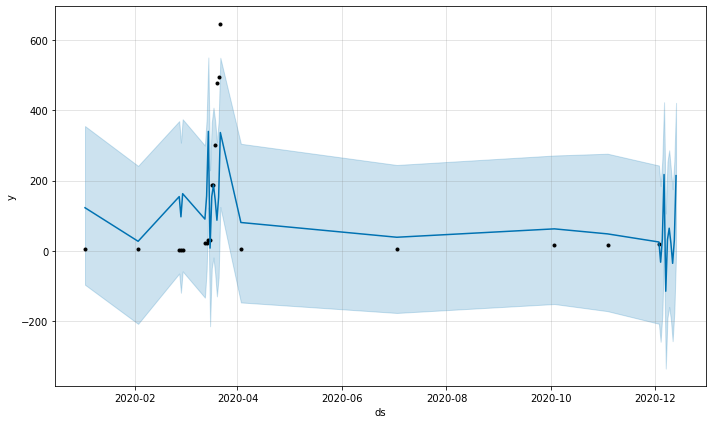

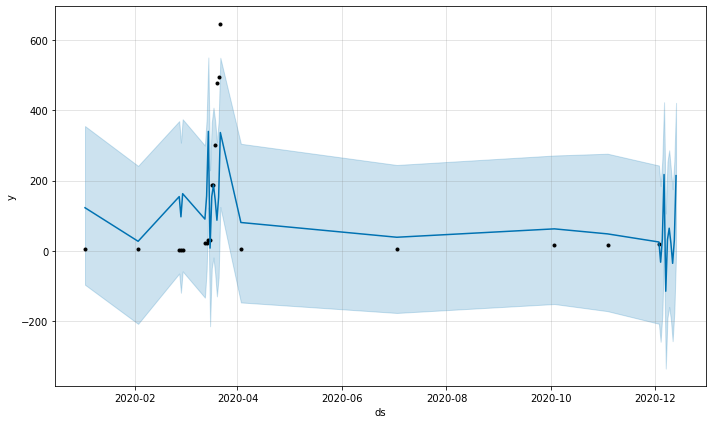

In [653]:
# Plot Prediction
m.plot(prediction)

In [0]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

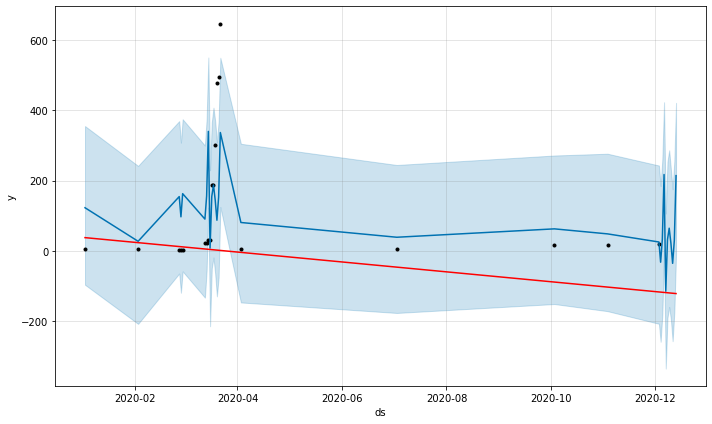

In [655]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)